## Daten auswerten

Data size: (15342080, 26)
Types of mobile: 8
['Base Station' 'Class A' 'Class B' 'AtoN' 'Man Overboard Device'
 'Search and Rescue Transponder' 'SAR Airborne' 'Emergency PIRB']
Type of mobile
Class A                          13589560
Base Station                      1125537
Class B                            530870
AtoN                                82453
SAR Airborne                         7821
Man Overboard Device                 5818
Emergency PIRB                         12
Search and Rescue Transponder           9
Name: count, dtype: int64
Number of Units: 2833
Number of Base Station: 45
Number of Class B: 930
Number of AtoN: 131
Number of Man Overboard Device: 2
Number of SAR Airborne: 9
Number of Emergency PIRB: 3
Number of Search and Rescue Transponder: 2
Number of Class A: 1938
Latitude: count    1.878692e+06
mean     7.233522e+00
std      6.764198e+01
min      1.000000e+00
25%      2.000000e+00
50%      3.000000e+00
75%      6.000000e+00
max      6.265100e+04
Name: count, 

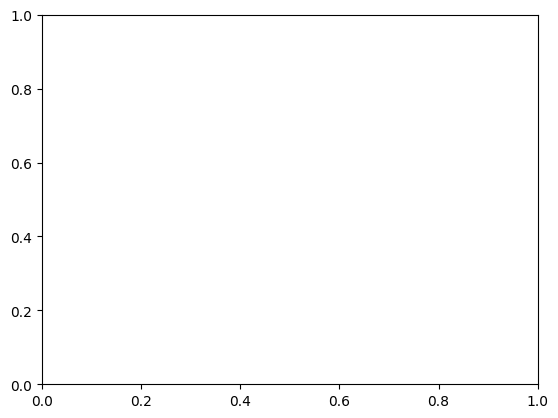

In [16]:
#dk AIS
import pandas as pd
import sklearn as sk
import numpy as np
import pickle

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

from sklearn.neural_network import MLPRegressor

#from autosklearn.regression import AutoSklearnRegressor
#import autosklearn.metrics

import time # localtime to unix time
from datetime import datetime  # localtime to unix time
from datetime import date # localtime to unix time

from pathlib import Path

import time # localtime to unix time


from joblib import Parallel, delayed
from tqdm import tqdm
import numpy as np
from pathlib import Path
import pandas as pd
from matplotlib import pyplot as plt

filename = "aisdk-2023-11-08"
#filename = "aisdk-2023-11-08-s"
#filename = "aisdk-2023-11-08-xs"
#filename = "aisTestFile_500k_knn"
#filename = "aisdk-2023-11-11_266288000_s_1_knn_Step2b"

folderoutput = f"../workdir/AIS-Images/{filename}_analyse/"

# data =  pd.read_csv("../workdir/AIS-KNN-Files/aisdk-2023-11-08-xs_2_knn.csv", lineterminator='$').values.reshape((-1,100,6))
data =  pd.read_csv(f"../workdir/AIS-Files/{filename}.csv")#, lineterminator='$')#.values.reshape((-1,100,6))

# https://github.com/sktime/sktime/blob/v0.11.4/sktime/datatypes/_panel/_convert.py#L608-L668
#multiindex = pd.MultiIndex.from_product([range(s) for s in data.shape], names=["track", "timeindex", "column"])
#data = pd.Series(data.flatten(), index=multiindex).unstack(level="column")
#data.columns = ["mmsi", "time", "x", "y", "deg", "dist"]
#data = data.drop(columns=["deg", "dist"])
#data["time"] = pd.to_datetime(data["time"], unit="s")


data.head(100)

#print(f"Type of mobile: {data['Type of mobile'].nunique()}")
#print(f"Type of mobile: {data['Type of mobile'].nunique()}")
#print(data.Type of mobile.unique())

# Anzahl der Datenpunkte
print(f"Data size: {data.shape}")
print(f"Types of mobile: {data['Type of mobile'].nunique()}")
#print(data.MMSI.unique()) 
print(pd.unique(data['Type of mobile'])) 
print(data['Type of mobile'].value_counts())
print(f"Number of Units: {data['MMSI'].nunique()}") 
#print(f"Number of Class A: {data['MMSI'].nunique()}")

data['Type of mobile'].hist(bins=data['Type of mobile'].nunique(), xrot=45)
plt.ylabel('Anzahl')
plt.xlabel('Type of mobile')
#plt.show
plt.savefig(f"{folderoutput}{filename}_TOM.png", bbox_inches='tight', dpi=600)
plt.cla()

# Histogramm Type of mobile
#print(data['Type of mobile'].value_counts().plot(kind='bar'))
#print(data['Type of mobile'].hist())

#print(data['Type of mobile'].value_counts("Base Station"))
#print(data['Type of mobile'].value_counts("Class B"))
#print(data['Type of mobile'].value_counts("AtoN"))
#print(data['Type of mobile'].value_counts("Man Overboard Device"))

# Time

#ddata = data.copy()


#epoch_time = dt.timestamp()
'''Wandelt das Datumsformat (DD/MM/YYYY HH:MM:SS) in Unix Zeit um'''
'''Wandelt das Datumsformat (YYYY-MM-DDTHH:MM:SS) in Unix Zeit um'''
#print(ddata.shape)
#elements = ddata[['# Timestamp']].to_numpy()
#print(elements.shape)

# print(elements)

#tmpElement = []
#posElement = 0

    # timeformat (DD/MM/YYYY HH:MM:SS)

#while posElement < len(elements):
#    tmpElement = elements[posElement][0]     
#    tmpElement = tmpElement.replace(':','/')
#    tmpElement = tmpElement.replace(' ','/')
#    tmpElement = list(map(int,tmpElement.split('/')))
#    tmpElement = datetime(tmpElement[2], tmpElement[1], tmpElement[0], tmpElement[3], tmpElement[4], tmpElement[5])
#    elements[posElement][0] = int(tmpElement.timestamp() )
#    
#    posElement = posElement + 1


#ddata = pd.DataFrame({'Time': elements[:, 0]})#


#print('timeConversion Zeit gewandelt: \t' + str(len(elements)))
#print(ddata.shape)
#print(ddata['Time'].hist())

#exit






# Base Station

ddata = data.copy()

ddata = ddata.drop(data[data['Type of mobile']  == "Class A" ].index)
#ddata = ddata.drop(data[data['Type of mobile']  == "Base Station" ].index)
ddata = ddata.drop(data[data['Type of mobile']  == "Class B" ].index)
ddata = ddata.drop(data[data['Type of mobile']  == "AtoN" ].index)
ddata = ddata.drop(data[data['Type of mobile']  == "Man Overboard Device" ].index)
ddata = ddata.drop(data[data['Type of mobile']  == "SAR Airborne" ].index)
ddata = ddata.drop(data[data['Type of mobile']  == "Emergency PIRB" ].index)
ddata = ddata.drop(data[data['Type of mobile']  == "Search and Rescue Transponder" ].index)

# Anzahl der Base Station
# print(pd.unique(ddata['Type of mobile'])) 
#print(ddata['Type of mobile'].value_counts())
print(f"Number of Base Station: {ddata['MMSI'].nunique()}") 
ddata = []

# Class B

ddata = data.copy()

ddata = ddata.drop(data[data['Type of mobile']  == "Class A" ].index)
ddata = ddata.drop(data[data['Type of mobile']  == "Base Station" ].index)
#ddata = ddata.drop(data[data['Type of mobile']  == "Class B" ].index)
ddata = ddata.drop(data[data['Type of mobile']  == "AtoN" ].index)
ddata = ddata.drop(data[data['Type of mobile']  == "Man Overboard Device" ].index)
ddata = ddata.drop(data[data['Type of mobile']  == "SAR Airborne" ].index)
ddata = ddata.drop(data[data['Type of mobile']  == "Emergency PIRB" ].index)
ddata = ddata.drop(data[data['Type of mobile']  == "Search and Rescue Transponder" ].index)

# Anzahl der Base Station
#print(pd.unique(ddata['Type of mobile'])) 
#print(ddata['Type of mobile'].value_counts())
print(f"Number of Class B: {ddata['MMSI'].nunique()}") 
ddata = []

# AtoN

ddata = data.copy()

ddata = ddata.drop(data[data['Type of mobile']  == "Class A" ].index)
ddata = ddata.drop(data[data['Type of mobile']  == "Base Station" ].index)
ddata = ddata.drop(data[data['Type of mobile']  == "Class B" ].index)
#ddata = ddata.drop(data[data['Type of mobile']  == "AtoN" ].index)
ddata = ddata.drop(data[data['Type of mobile']  == "Man Overboard Device" ].index)
ddata = ddata.drop(data[data['Type of mobile']  == "SAR Airborne" ].index)
ddata = ddata.drop(data[data['Type of mobile']  == "Emergency PIRB" ].index)
ddata = ddata.drop(data[data['Type of mobile']  == "Search and Rescue Transponder" ].index)

# Anzahl der Base Station
#print(pd.unique(ddata['Type of mobile'])) 
#print(ddata['Type of mobile'].value_counts())
print(f"Number of AtoN: {ddata['MMSI'].nunique()}") 
ddata = []

# Man Overboard Device

ddata = data.copy()

ddata = ddata.drop(data[data['Type of mobile']  == "Class A" ].index)
ddata = ddata.drop(data[data['Type of mobile']  == "Base Station" ].index)
ddata = ddata.drop(data[data['Type of mobile']  == "Class B" ].index)
ddata = ddata.drop(data[data['Type of mobile']  == "AtoN" ].index)
#ddata = ddata.drop(data[data['Type of mobile']  == "Man Overboard Device" ].index)
ddata = ddata.drop(data[data['Type of mobile']  == "SAR Airborne" ].index)
ddata = ddata.drop(data[data['Type of mobile']  == "Emergency PIRB" ].index)
ddata = ddata.drop(data[data['Type of mobile']  == "Search and Rescue Transponder" ].index)

# Anzahl der Base Station
#print(pd.unique(ddata['Type of mobile'])) 
#print(ddata['Type of mobile'].value_counts())
print(f"Number of Man Overboard Device: {ddata['MMSI'].nunique()}") 
ddata = []

# SAR Airborne

ddata = data.copy()

ddata = ddata.drop(data[data['Type of mobile']  == "Class A" ].index)
ddata = ddata.drop(data[data['Type of mobile']  == "Base Station" ].index)
ddata = ddata.drop(data[data['Type of mobile']  == "Class B" ].index)
ddata = ddata.drop(data[data['Type of mobile']  == "AtoN" ].index)
ddata = ddata.drop(data[data['Type of mobile']  == "Man Overboard Device" ].index)
#ddata = ddata.drop(data[data['Type of mobile']  == "SAR Airborne" ].index)
ddata = ddata.drop(data[data['Type of mobile']  == "Emergency PIRB" ].index)
ddata = ddata.drop(data[data['Type of mobile']  == "Search and Rescue Transponder" ].index)

# Anzahl der Base Station
#print(pd.unique(ddata['Type of mobile'])) 
#print(ddata['Type of mobile'].value_counts())
print(f"Number of SAR Airborne: {ddata['MMSI'].nunique()}") 
ddata = []

# Emergency PIRB

ddata = data.copy()

ddata = ddata.drop(data[data['Type of mobile']  == "Class A" ].index)
ddata = ddata.drop(data[data['Type of mobile']  == "Base Station" ].index)
ddata = ddata.drop(data[data['Type of mobile']  == "Class B" ].index)
ddata = ddata.drop(data[data['Type of mobile']  == "AtoN" ].index)
ddata = ddata.drop(data[data['Type of mobile']  == "Man Overboard Device" ].index)
ddata = ddata.drop(data[data['Type of mobile']  == "SAR Airborne" ].index)
#ddata = ddata.drop(data[data['Type of mobile']  == "Emergency PIRB" ].index)
ddata = ddata.drop(data[data['Type of mobile']  == "Search and Rescue Transponder" ].index)

# Anzahl der Base Station
#print(pd.unique(ddata['Type of mobile'])) 
#print(ddata['Type of mobile'].value_counts())
print(f"Number of Emergency PIRB: {ddata['MMSI'].nunique()}") 
ddata = []

# Search and Rescue Transponder

ddata = data.copy()

ddata = ddata.drop(data[data['Type of mobile']  == "Class A" ].index)
ddata = ddata.drop(data[data['Type of mobile']  == "Base Station" ].index)
ddata = ddata.drop(data[data['Type of mobile']  == "Class B" ].index)
ddata = ddata.drop(data[data['Type of mobile']  == "AtoN" ].index)
ddata = ddata.drop(data[data['Type of mobile']  == "Man Overboard Device" ].index)
ddata = ddata.drop(data[data['Type of mobile']  == "SAR Airborne" ].index)
ddata = ddata.drop(data[data['Type of mobile']  == "Emergency PIRB" ].index)
#ddata = ddata.drop(data[data['Type of mobile']  == "Search and Rescue Transponder" ].index)

# Anzahl der Base Station
#print(pd.unique(ddata['Type of mobile'])) 
#print(ddata['Type of mobile'].value_counts())
print(f"Number of Search and Rescue Transponder: {ddata['MMSI'].nunique()}")
ddata = [] 


# Class A

ddata = data.copy()
#ddata = ddata.drop(data[data['Type of mobile']  == "Class A" ].index)
ddata = ddata.drop(data[data['Type of mobile']  == "Base Station" ].index)
ddata = ddata.drop(data[data['Type of mobile']  == "Class B" ].index)
ddata = ddata.drop(data[data['Type of mobile']  == "AtoN" ].index)
ddata = ddata.drop(data[data['Type of mobile']  == "Man Overboard Device" ].index)
ddata = ddata.drop(data[data['Type of mobile']  == "SAR Airborne" ].index)
ddata = ddata.drop(data[data['Type of mobile']  == "Emergency PIRB" ].index)
ddata = ddata.drop(data[data['Type of mobile']  == "Search and Rescue Transponder" ].index)

# Anzahl der Base Station
#print(pd.unique(ddata['Type of mobile'])) 
#print(ddata['Type of mobile'].value_counts())
print(f"Number of Class A: {ddata['MMSI'].nunique()}") 

# Histogramm latitude
#print(ddata['Latitude'].hist())
ddd = ddata['Latitude'].value_counts()
print(f'Latitude: {ddd.describe()}')
ddd = []
ddata['Latitude'].hist(bins=100)
plt.ylabel('Positionen')
plt.xlabel('Breitengrad')
#plt.show
plt.savefig(f"{folderoutput}{filename}_lat.png", bbox_inches='tight', dpi=600)
plt.cla()

#fig = ax.get_figure()
#fig.show()
#ax.show()
#ax = []
#fig = []
# Histogramm longitude
#print(ddata['Longitude'].hist())
ddd = ddata['Longitude'].value_counts()
print(f'Longitude: {ddd.describe()}')
ddd = []
ddata['Longitude'].hist(bins=100)
plt.ylabel('Positionen')
plt.xlabel('Längengrad')
#plt.show
plt.savefig(f"{folderoutput}{filename}_long.png", bbox_inches='tight', dpi=600)
plt.cla()

# Histogramm MMSI
#print(ddata['MMSI'].value_counts().plot(kind='bar'))

#ddata['MMSI'].hist(bins=ddata['MMSI'].nunique())
ddata['MMSI'].hist(bins=1765)
#ddata['MMSI'].value_counts().plot(kind='bar')
plt.ylabel('Positionen')
plt.xlabel('Schiffe')
#plt.show
plt.savefig(f"{folderoutput}{filename}_mmsi.png", bbox_inches='tight', dpi=600)
plt.cla()


#print(ddata['MMSI'].value_counts())

ddd = ddata['MMSI'].value_counts()

print(f'MMSI: {ddd.describe()}')
ddd = []
#plt.scatter(pd.unique(ddata['MMSI']),ddd['AmA'], s=0.002)
#plt.ylabel('Positionen')
#plt.xlabel('Schiffe')
##plt.show
#plt.savefig(f"{folderoutput}{filename}_mmsi2.png", bbox_inches='tight', dpi=600)
#plt.cla()

#print(f"Number of MMSI: {ddata['MMSI'].describe()}")
#df_loc = []

# Histogramm Time
ddd = ddata['# Timestamp'].value_counts()
print(f'Time: {ddd.describe()}')
ddd = []
ddata['# Timestamp'] = pd.to_datetime(ddata['# Timestamp'], format='%d/%m/%Y %H:%M:%S', )
#print(ddata['# Timestamp'].hist())
ddata['# Timestamp'].hist(bins=(ddata['# Timestamp'].nunique()), xrot=45)
plt.ylabel('Positionen/Sekunde')
plt.xlabel('Zeit')
#plt.show
plt.savefig(f"{folderoutput}{filename}_time.png", bbox_inches='tight', dpi=600)
plt.cla()


ddata = []

# Class A MMSI

#ddata = ddata['MMSI'].nunique()




#Wieviele A Schiffe gibt es?
#Wieviele B Schiffe gibt es?
#Wieviele C Schiffe gibt es?
#Wieviele D Schiffe gibt es?

#Wieviele Datenpunkte gibt es pro A Schiff?


#Daten pro Sekunde - Histogramm
#Pflege der Daten - NaN
#Data source type

# Histogramm Latitude
#print(data['Latitude'].hist())
# Histogramm Longitude
#print(data['Longitude'].hist())
# Histogramm IMO
##rint(data['IMO'].hist())
#Anzahl - Anteil MMSI
#Anzahl - Anteil LAT

#Anzahl - Anteil LON
#Anzahl - Anteil IMO




#folder = "../workdir/AIS-KNN-Files/"
#filename = f"aisdk-2023-11-08-xs_2_knn"

#filename = "aisdk-2023-11-08-6xs_2_knn"

#ddata.head(4)

In [17]:
filename = "aisdk-2023-11-08-6xs"
data =  pd.read_csv(f"../workdir/AIS-Files/{filename}.csv")
data.head()

,# Timestamp,Type of mobile,MMSI,Latitude,Longitude,Navigational status,ROT,SOG,COG,Heading,...,Length,Type of position fixing device,Draught,Destination,ETA,Data source type,A,B,C,D
0,08/11/2023 00:00:00,Base Station,2190069,57.003780,9.824145,Unknown value,NaN,NaN,NaN,NaN,...,NaN,GPS,NaN,Unknown,NaN,AIS,NaN,NaN,NaN,NaN
1,08/11/2023 00:00:00,Class A,257038590,57.125193,8.596375,Under way using engine,NaN,6.1,86.8,82.0,...,NaN,Undefined,NaN,Unknown,NaN,AIS,NaN,NaN,NaN,NaN
2,08/11/2023 00:00:00,Class A,255806465,56.555510,11.041318,Under way using engine,0.0,8.4,174.1,173.0,...,NaN,Undefined,NaN,Unknown,NaN,AIS,NaN,NaN,NaN,NaN
3,08/11/2023 00:00:00,Class B,219026056,91.000000,0.000000,Unknown value,NaN,NaN,NaN,NaN,...,12.0,Undefined,NaN,Unknown,NaN,AIS,6.0,6.0,2.0,2.0
4,08/11/2023 00:00:00,Base Station,2190064,56.716570,11.519050,Unknown value,NaN,NaN,NaN,NaN,...,NaN,GPS,NaN,Unknown,NaN,AIS,NaN,NaN,NaN,NaN


Data size: (22319199, 6)
Number of Class A: 1089
Time: count    86316.000000
mean       258.575455
std         56.495437
min          8.000000
25%        224.000000
50%        256.000000
75%        296.000000
max       1120.000000
Name: count, dtype: float64
MMSI: count      1089.000000
mean      20495.132231
std       20932.902744
min         800.000000
25%        4800.000000
50%       14400.000000
75%       29600.000000
max      196000.000000
Name: count, dtype: float64
count      1089.000000
mean      20495.132231
std       20932.902744
min         800.000000
25%        4800.000000
50%       14400.000000
75%       29600.000000
max      196000.000000
Name: count, dtype: float64


,MMSI,Time,X,Y,Deg,Dist
0,2190045,2023-11-08 01:18:50,-1072.6,-8258.1,187.4,8327.5
1,2190045,2023-11-08 01:18:59,-1072.6,-8257.9,187.4,8327.3
2,2190045,2023-11-08 01:19:00,-1072.6,-8257.9,187.4,8327.3
3,2190045,2023-11-08 01:19:10,-1072.4,-8257.6,187.4,8326.9
4,2190045,2023-11-08 01:19:21,-1072.6,-8257.4,187.4,8326.8
...,...,...,...,...,...,...
97,2190045,2023-11-08 01:33:50,-1083.0,-8256.6,187.5,8327.3
98,2190045,2023-11-08 01:33:59,-1082.0,-8256.9,187.5,8327.5
99,2190045,2023-11-08 01:18:40,1072.0,-8258.2,172.6,8327.5
100,2190045,2023-11-08 01:18:50,1072.6,-8258.1,172.6,8327.5


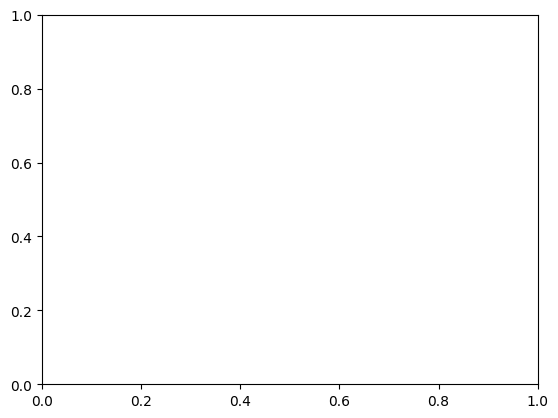

In [18]:
# kkn train
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


# train = pd.read_csv(f"../workdir/AIS-ModelFrames/aisdk-2023-11-08-xs_2_knn_train_{known}.csv")

#filename = "aisTestFile_500k_knn"
#filename = "aisdk-2023-11-11_266288000_s_1_knnknown = 9_Step2b"
filename = "aisdk-2023-11-08"
#filename = "aisdk-2023-11-08-s_2_knn_gnu"
#filename2 = "aisdk-2023-11-08-s_2_knn"

folderoutput = f"../workdir/AIS-Images/{filename}_analyse/"
filename = filename + "_1_knn_gnu"
df = pd.read_csv(f"../workdir/AIS-Files/{filename}.csv")

#data =  pd.read_csv(f"../workdir/AIS-KNN-Files/{filename2}.csv", lineterminator='$').values.reshape((-1,100,6))
#multiindex = pd.MultiIndex.from_product([range(s) for s in data.shape], names=["track", "timeindex", "column"])
#data = pd.Series(data.flatten(), index=multiindex).unstack(level="column")
#data.columns = ["mmsi", "time", "x", "y", "deg", "dist"]
#data = data.drop(columns=["deg", "dist"])
#data["time"] = pd.to_datetime(data["time"], unit="s")

df.columns = ['MMSI', 'Time', 'X', 'Y', 'Deg', 'Dist']
print(f"Data size: {df.shape}")
print(f"Number of Class A: {df['MMSI'].nunique()}") 


#Time
ddd = df['Time'].value_counts()
print(f'Time: {ddd.describe()}')
ddd = []

df['Time'] = df['Time']+3600
df['Time'] = pd.to_datetime(df['Time'],unit='s')

df['Time'].hist(bins=(df['Time'].nunique()), xrot=45)
plt.ylabel('Positionen/Sekunde')
plt.xlabel('Zeit')
#plt.show
plt.savefig(f"{folderoutput}{filename}_time.png", bbox_inches='tight', dpi=600)
plt.cla()




#MMSI
ddd = df['MMSI'].value_counts()
print(f'MMSI: {ddd.describe()}')
ddd = []

df['MMSI'].hist(bins=(df['MMSI'].nunique()))
plt.ylabel('Positionen')
plt.xlabel('Schiffe')
#plt.show
plt.savefig(f"{folderoutput}{filename}_mmsi.png", bbox_inches='tight', dpi=600)
plt.cla()

ddd = df['MMSI'].value_counts()

print(ddd.describe())

#print(f"Number of MMSI: {ddata.describe(include=['MMSI'])}")

#Distances



#Time of Travel

#Speed


df.head(102)
#data.head(4)

Data size: (2681903, 29)
Travel time: count       177.00000
mean      15151.99435
std       36709.57637
min           6.00000
25%         228.00000
50%        3453.00000
75%       15357.00000
max      339071.00000
Name: count, dtype: float64
range: count     1062.000000
mean      2525.332392
std       3859.724588
min          6.000000
25%         99.000000
50%       2161.000000
75%       3370.750000
max      54876.000000
Name: count, dtype: float64
angle: count      361.000000
mean      7429.094183
std       2175.933302
min       3215.000000
25%       6603.000000
50%       7308.000000
75%       7804.000000
max      43498.000000
Name: count, dtype: float64
Speed: count    28198.000000
mean        95.109689
std        399.170190
min          4.000000
25%          8.000000
50%         24.000000
75%         78.000000
max      52043.000000
Name: count, dtype: float64
Speed Max: 52043


,input_0_time,input_0_x,input_0_y,input_1_time,input_1_x,input_1_y,input_2_time,input_2_x,input_2_y,input_3_time,...,input_7_x,input_7_y,input_8_time,input_8_x,input_8_y,output_x,output_y,range,angle,Speed
0,91.0,0.0,0.0,81.0,-2.0,39.5,71.0,-3.9,85.3,60.0,...,-6.7,315.5,11.0,-7.4,360.1,-8.5,411.0,411.0,91.0,4.516484
1,90.0,0.0,0.0,81.0,-36.5,-13.5,70.0,-73.0,-26.9,60.0,...,-237.6,-88.7,10.0,-274.5,-102.3,-301.4,-112.4,322.0,-160.0,3.577778
2,110.0,0.0,0.0,91.0,99.1,0.3,81.0,151.8,-0.6,71.0,...,411.3,7.8,21.0,463.2,7.8,572.8,8.3,573.0,1.0,5.209091
3,86.0,0.0,0.0,84.0,1.1,2.1,79.0,4.2,7.2,69.0,...,24.3,44.0,9.0,28.4,52.6,29.8,55.0,63.0,62.0,0.732558


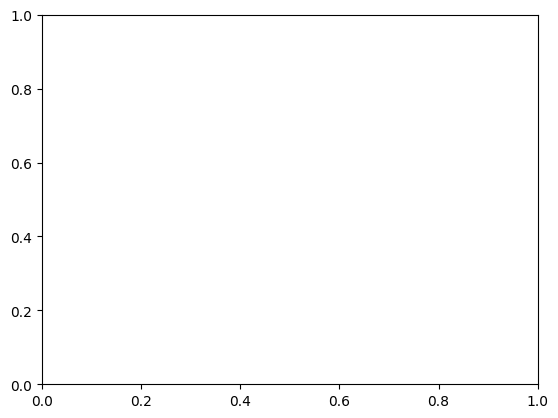

In [19]:
# analysis train
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import math


# train = pd.read_csv(f"../workdir/AIS-ModelFrames/aisdk-2023-11-08-xs_2_knn_train_{known}.csv")

#filename = "aisTestFile_500k_knn"
#filename = "aisdk-2023-11-11_266288000_s_1_knnknown = 9_Step2b"
filename = "aisdk-2023-11-08"
#filename = "aisdk-2023-11-08-s_2_knn"

folderoutput = f"../workdir/AIS-Images/{filename}_analyse/"
filename = filename + "_1_knn"
known = 9
df = pd.read_csv(f"../workdir/AIS-ModelFrames/{filename}_train_{known}_0.csv")

print(f"Data size: {df.shape}")


# Travel time
df['input_0_time'].hist(bins=df['input_0_time'].nunique())
plt.ylabel('Schiffesbewegung')
plt.xlabel('Zeit [s]')
#plt.show
plt.savefig(f"{folderoutput}{filename}_train_{known}_0_time.png", bbox_inches='tight', dpi=600)
plt.cla()

ddd = df['input_0_time'].value_counts()
print(f"Travel time: {ddd.describe()}")


# Distance 
df['range'] = np.sqrt(df['output_x']**2 + df['output_y']**2)
df['range'].hist(bins=300)
plt.ylabel('Schiffesbewegung')
plt.xlabel('Distanz [m]')
#plt.show
plt.savefig(f"{folderoutput}{filename}_train_{known}_0_distance.png", bbox_inches='tight', dpi=600)
plt.cla()

df['range'] = df['range'].round(0)
ddd = df['range'].value_counts()
print(f"range: {ddd.describe()}")


# Heading
df['angle'] = (np.arctan2(df['output_y'], df['output_x'])) * 180 / math.pi
df['angle'].hist(bins=360)
plt.ylabel('Schiffesbewegung')
plt.xlabel('Kurs [deg]')
#plt.show
plt.savefig(f"{folderoutput}{filename}_train_{known}_0_heading.png", bbox_inches='tight', dpi=600)
plt.cla()

df['angle'] = df['angle'].round(0)
ddd = df['angle'].value_counts()
print(f"angle: {ddd.describe()}")

#Speed
df['Speed'] = df['range'] / df['input_0_time']
df['Speed'].hist(bins=100)
plt.ylabel('Schiffesbewegung')
plt.xlabel('Geschwindigkeit [m/s]')
#plt.show
plt.savefig(f"{folderoutput}{filename}_train_{known}_0_speed.png", bbox_inches='tight', dpi=600)
plt.cla()

ddd = df['Speed'].value_counts()
print(f"Speed: {ddd.describe()}")
print(f"Speed Max: {ddd.max()}")


df.head(4)

Data size: (1112344, 29)
test 9 0 Travel time: count       165.000000
mean       6741.478788
std       16295.440829
min           7.000000
25%         171.000000
50%        1622.000000
75%        6695.000000
max      146425.000000
Name: count, dtype: float64
test 9 0 range: count    140903.000000
mean          7.894395
std          14.032382
min           2.000000
25%           7.000000
50%           8.000000
75%           8.000000
max        4985.000000
Name: count, dtype: float64
test 9 0 Heading: count    1.041288e+06
mean     1.068239e+00
std      9.923448e+00
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      8.296000e+03
Name: count, dtype: float64
test 9 0 Speed: count    145448.000000
mean          7.647709
std          13.121417
min           2.000000
25%           7.000000
50%           8.000000
75%           8.000000
max        4985.000000
Name: count, dtype: float64
Data size: (1112344, 29)
test 9 5 Travel time: count       165.

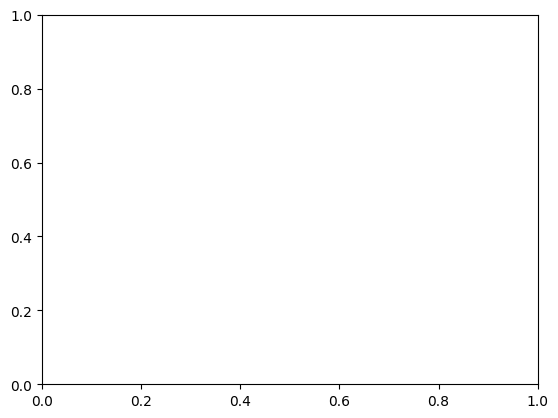

In [20]:
#analysis train/test
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import math


# train = pd.read_csv(f"../workdir/AIS-ModelFrames/aisdk-2023-11-08-xs_2_knn_train_{known}.csv")

#filename = "aisTestFile_500k_knn"
#filename = "aisdk-2023-11-11_266288000_s_1_knnknown = 9_Step2b"
#filename = "aisdk-2023-11-08-s_2_knn"
filename = "aisdk-2023-11-08"
#filename = 'aisdk-2023-11-08-xs_3_knn'
filename = filename + "_1_knn"

for mode in ("test", "train"):
    
    folderoutput = f"../workdir/AIS-Images/{filename}_analyse/"
    
    known = 9
    if mode == "test":
        noise_levels = 0, 5, 10
    else:
        noise_levels = 0, 0, 0
    for noise in noise_levels:
        df = pd.read_csv(f"../workdir/AIS-ModelFrames/{filename}_{mode}_{known}_{noise}.csv")

        #df.columns = ['MMSI', 'Time', 'X', 'Y', 'Deg', 'Dist']
        print(f"Data size: {df.shape}")

        # Travel time
        df['input_0_time'].hist(bins=df['input_0_time'].nunique())
        plt.ylabel('Schiffesbewegung')
        plt.xlabel('Zeit [s]')
        #plt.show
        plt.savefig(f"{folderoutput}{filename}_{mode}_{known}_{noise}_time.png", bbox_inches='tight', dpi=600)
        plt.cla()

        ddd = df['input_0_time'].value_counts()
        print(f"{mode} {known} {noise} Travel time: {ddd.describe()}")


        # Distance 
        df['range'] = np.sqrt(df['output_x']**2 + df['output_y']**2)
        df['range'].hist(bins=300)
        plt.ylabel('Schiffesbewegung')
        plt.xlabel('Distanz [m]')
        #plt.show
        plt.savefig(f"{folderoutput}{filename}_{mode}_{known}_{noise}_distance.png", bbox_inches='tight', dpi=600)
        plt.cla()

        ddd = df['range'].value_counts()
        print(f"{mode} {known} {noise} range: {ddd.describe()}")


        # Heading
        df['angle'] = (np.arctan2(df['output_y'], df['output_x'])) * 180 / math.pi
        df['angle'].hist(bins=360)
        plt.ylabel('Schiffesbewegung')
        plt.xlabel('Kurs [deg]')
        #plt.show
        plt.savefig(f"{folderoutput}{filename}_{mode}_{known}_{noise}_heading.png", bbox_inches='tight', dpi=600)
        plt.cla()

        ddd = df['angle'].value_counts()
        print(f"{mode} {known} {noise} Heading: {ddd.describe()}")

        #Speed
        df['Speed'] = df['range'] / df['input_0_time']
        df['Speed'].hist(bins=100)
        plt.ylabel('Schiffesbewegung')
        plt.xlabel('Geschwindigkeit [m/s]')
        #plt.show
        plt.savefig(f"{folderoutput}{filename}_{mode}_{known}_{noise}_speed.png", bbox_inches='tight', dpi=600)
        plt.cla()

        ddd = df['Speed'].value_counts()
        print(f"{mode} {known} {noise} Speed: {ddd.describe()}")

        df.head(4)

Data size: (15342080, 2)


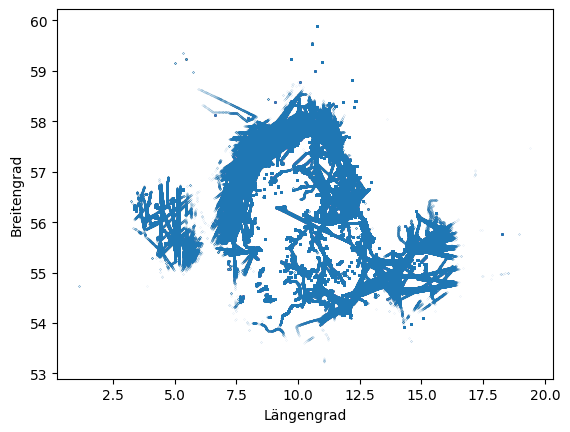

In [21]:
# Mape 

import pandas as pd
import sklearn as sk
import numpy as np
from matplotlib import pyplot as plt

filename = "aisdk-2023-11-08"
#filename = "aisdk-2023-11-08_2_knn"
#filename = "aisdk-2023-11-08-s_2_knn"
#filename = "aisdk-2023-11-08-xs"
#filename = "aisdk-2023-11-08-s"
#filename = "aisdk-2023-11-08-6xs"
#filename = "aisTestFile_500k_knn"
#filename = "aisdk-2023-11-11_266288000_s_1_knn_Step2b"

#folderoutput = "../workdir/AIS-Images/"
folderoutput = f"../workdir/AIS-Images/{filename}_analyse/"

# data =  pd.read_csv("../workdir/AIS-KNN-Files/aisdk-2023-11-08-xs_2_knn.csv", lineterminator='$').values.reshape((-1,100,6))
df =  pd.read_csv(f"../workdir/AIS-Files/{filename}.csv")#, lineterminator='$')#.values.reshape((-1,100,6))h

df.head(4)

# print(f"Data size: {df.shape}")

df.drop(columns=['MMSI', '# Timestamp', 'Type of mobile', 'Navigational status', 'ROT', 'SOG', 'COG', 'Heading', 'IMO', 'Callsign', 'Name', 'Ship type', 'Cargo type', 'Length', 'Type of position fixing device', 'Draught', 'Destination', 'ETA', 'Data source type', 'A', 'B', 'C', 'D', 'Width'], inplace=True)


df = df[['Latitude', 'Longitude']]
df.head(4)
print(f"Data size: {df.shape}")

#df.to_csv(f"{folderoutput}{filename}_mape.csv", index=False)

#df.plot(x='Longitude',y='Latitude', kind='scatter', s=0.002)
plt.scatter(df['Longitude'],df['Latitude'], s=0.002)

plt.ylabel('Breitengrad')
plt.xlabel('Längengrad')
plt.savefig(f"{folderoutput}{filename}_mape_raw.png", bbox_inches='tight', dpi=600)
plt.cla()

#filter 
df = df[df['Latitude'] > 53]
df = df[df['Latitude'] < 60]

df = df[df['Longitude'] > 0]
df = df[df['Longitude'] < 22]

plt.scatter(df['Longitude'],df['Latitude'], s=0.002)

plt.ylabel('Breitengrad')
plt.xlabel('Längengrad')
plt.savefig(f"{folderoutput}{filename}_mape_cut.png", bbox_inches='tight', dpi=600)



Data size: (22319200, 6)
Data size: (22319200, 2)


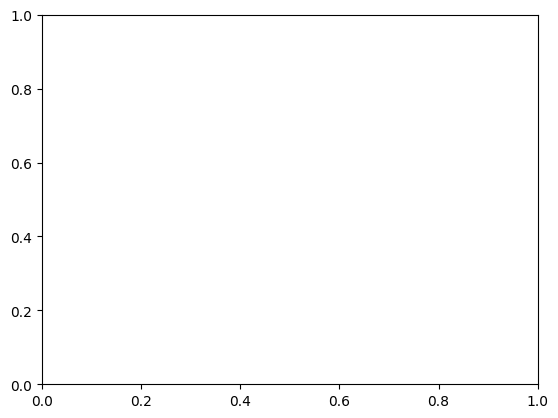

In [22]:
# Mape knn

import pandas as pd
import sklearn as sk
import numpy as np
from matplotlib import pyplot as plt

filename = "aisdk-2023-11-08"
#filename = "aisdk-2023-11-08_2"
#filename = "aisdk-2023-11-08-s_2_knn"
#filename = "aisdk-2023-11-08-xs"
#filename = "aisdk-2023-11-08-s"
#filename = "aisdk-2023-11-08-6xs"
#filename = "aisTestFile_500k_knn"
#filename = "aisdk-2023-11-11_266288000_s_1_knn_Step2b"

#folderoutput = "../workdir/AIS-Images/"
folderoutput = f"../workdir/AIS-Images/{filename}_analyse/"

filename = filename + "_1_knn_gnu"
columnsname = ['MMSI', 'Timestamp', 'Latitude', 'Longitude', 'Degree' ,'Distance']
# data =  pd.read_csv("../workdir/AIS-KNN-Files/aisdk-2023-11-08-xs_2_knn.csv", lineterminator='$').values.reshape((-1,100,6))
df =  pd.read_csv(f"../workdir/AIS-Files/{filename}.csv", names=columnsname)#, lineterminator='$')#.values.reshape((-1,100,6))h

# df.head(4)

print(f"Data size: {df.shape}")

# df.drop(columns=['MMSI', '# Timestamp', 'Type of mobile', 'Navigational status', 'ROT', 'SOG', 'COG', 'Heading', 'IMO', 'Callsign', 'Name', 'Ship type', 'Cargo type', 'Length', 'Type of position fixing device', 'Draught', 'Destination', 'ETA', 'Data source type', 'A', 'B', 'C', 'D', 'Width'], inplace=True)



df.drop(columns=['MMSI', 'Timestamp', 'Degree', 'Distance'], inplace=True)
# df.head(4)
print(f"Data size: {df.shape}")

#df.to_csv(f"{folderoutput}{filename}_mape.csv", index=False)

#df.plot(x='Longitude',y='Latitude', kind='scatter', s=0.002)
plt.scatter(df['Longitude'],df['Latitude'], s=0.002)

plt.ylabel('Breitengrad')
plt.xlabel('Längengrad')
plt.savefig(f"{folderoutput}{filename}_mape_knn.png", bbox_inches='tight', dpi=600)
plt.cla()



In [23]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

folderinput = "../workdir/AIS-TrainedModel/"
folderoutput = "../workdir/AIS-Images/"

#filename = f"aisdk-2023-11-08-s_2_knn_result_18000_10240"
# filename = f"aisdk-2023-11-08-s_2_knn_result_14400_6144"
filename = 'aisdk-2023-11-08-xs_3_knn_result'
# filename = f"aisdk-2023-11-08-xs_2_knn_result"
#filename = f"aisdk-2023-11-08_1_knn_result_18000_10240"
#df_res = []
df_res = pd.read_csv(f"{folderinput}{filename}.csv")


# print(df_res.shape)

for known in range(3, 13, 1):
    for noise in range(0, 11, 5):
        df_res = df_res.rename(columns={f"nn_{known}_{noise}": f"ml_{known}_{noise}"})
        df_res[f" _{known}_{noise}"] = df_res[f"bl_{known}_{noise}"] * 0 + 30
        #df_res = df_res.drop(columns=[f"known_{known}_{noise}"])
        #df_res = df_res.drop(columns=[f"noise_{known}_{noise}"])
        for alg in ['bl', 'lr', 'ml', ' ']: #, 'as']:
            df_res = df_res.rename(columns={f'{alg}_{known}_{noise}' :f'{alg}_{known}w{noise}'})
        df_res[f' _3w{noise}'] = df_res[f' _3w{noise}'] * 0

print(type(df_res))
print(df_res.head(4))
df_tmp = pd.DataFrame(df_res['bl_3w0'].copy())
print(type(df_tmp))
#print(df_tmp.head(4))

for alg in ['bl', 'lr', 'ml', ' ', 'as']:
    for noise in range(0, 11, 5):
        for known in range(3, 13, 1):
            df_tmp[f'{alg}_{known}w{noise}'] = df_res[f'{alg}_{known}w{noise}']

df_res = []
df_res = df_tmp.copy()
df_tmp = []
df_tmp = df_res.copy()

df_res = df_tmp.copy()
df_tmp = []


# print(df_res.shape)

print(df_res.head(4))


for noise in range(0, 11, 5):
    df_loc = df_res.copy()
    df_loc = df_loc.filter(regex=f"w{noise}")

    for alg in ['bl', 'lr', 'ml', 'as', ' ']:
        for noise in range(0, 11, 5):
            df_loc = df_loc.rename({f'{alg}_{known}w{noise}' :f'{alg}_{known}_{noise}'})


    

    # if noise == 0:
    colors = {'bl_0': 'blue', 'lr_0': 'red', 'ml_0': 'green', 'as_0': 'yellow', ' _0': 'w', 'bl_5': 'navy', 'lr_5': 'darkred', 'ml_5': 'darkgreen', 'as_5': 'darkgoldenrod', ' _5': 'w', 'bl_10': 'royalblue', 'lr_10': 'indianred', 'ml_10': 'lightgreen', 'as_10': 'khaki', ' _10': 'w'}
        # addit = 0

    # elif noise == 5:
    #     colors = {'bl': 'navy', 'lr': 'darkred', 'ml': 'darkgreen', 'as': 'darkgoldenrod', ' ': 'w'}
    #     addit = 0.5
    # elif noise == 10:
    #     colors = {'bl': 'royalblue', 'lr': 'indianred', 'ml': 'lightgreen', 'as': 'khaki', ' ': 'w'}
    #     addit = 1



#         ## Offset noise 5 by 0.5 10 by 1.
#     for known in range(3,13,3):
#         df_loc = df_loc.rename()

for alg in ['bl', 'lr', 'ml', 'as', ' ']:
#         #df_tmp[f"{alg}_{known}_{noise}"] = df_loc
#         df_loc.filter(regex=f'^{alg}_').median().plot(style='o', color=colors[alg], label=alg, rot=90) #, figsize=(10, 10))

#     for alg in ['bl', 'lr', 'ml', ' ']: #'as', ' ']:
#         #df_tmp[f"{alg}_{known}_{noise}"] = df_loc
#         df_loc.filter(regex=f'^{alg}_').median().plot(style='o', color=colors[alg], label=alg, rot=90) #, figsize=(10, 10))
# #         #plt.xticks(df_loc[f'^{alg}_'], labels=[f"{known}_{noise}" for known in range(3, 13, 3)])

# plt.ylabel('Präzession in [m]')
# plt.xlabel('Bekannte Positionen')

# #xticks_labels = [col.replace('as_', '') for col in df_res.columns if col.startswith('as_')]
# #plt.xticks(ticks=range(len(xticks_labels)), labels=xticks_labels, rotation=45)

# #plt.title('Median of Every Column in df_res as Points with Different Categories in Different Colors')
# plt.legend()
# plt.show()

# plt.savefig(f"{folderoutput}/{filename}/{filename}_test_X_{noise}_X.png", bbox_inches='tight', dpi=600)
# df_loc = []
# plt.cla()

IndentationError: expected an indented block (832784639.py, line 103)

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

folderinput = "../workdir/AIS-TrainedModel/"
folderoutput = "../workdir/AIS-Images/"

#filename = f"aisdk-2023-11-08-s_2_knn_result_18000_10240"
#filename = f"aisdk-2023-11-08-s_2_knn_result_14400_6144"
#filename = f"aisdk-2023-11-08-xs_2_knn_result"
filename = f"aisdk-2023-11-08_1_knn_result_18000_10240"

df_res = pd.read_csv(f"{folderinput}{filename}.csv")

#for known in range(3, 13, 3):
#    for noise in range(0, 11, 5):
#        df_res = df_res.drop(columns=[f"known_{known}w{noise}"])
#        df_res = df_res.drop(columns=[f"noise_{known}w{noise}"])

# for known in range(9, 13, 3):
#     for noise in range(0, 11, 5):       
#         for alg in ['bl', 'lr', 'ml', 'as']:         
#             df_res = df_res.drop(columns=[f"{alg}_{known}_{noise}"])
            
df_res.head(-4)

#df_res['as_3_5'].describe()
#df_res['as_12_5'].describe()
print(df_res['as_3w5'].shape)
print(df_res['as_12w5'].shape)

(1112344,)
(1112344,)
